# 找出最近YouBike站，並做相關應用及統計
### 資料說明：新北市公共自行車租賃系統(YouBike)
### *-----------------2018/12/30日資料-----------------*
sno(站點代號)、sna(中文場站名稱)、tot(場站總停車格)、sbi(可借/位數)、sarea(中文場站區域)、mday(資料更新時間)、lat(緯度)、lng(經度)、ar(中文地址)、sareaen(英文場站區域)、snaen(英文場站名稱)、aren(英文地址)、bemp(可還空位數)、act(場站是否暫停營運)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import pi, cos, sin, arccos
import pylab as pl
mpl.rc('font', family='Noto Sans CJK TC')
%matplotlib inline

In [2]:
url = "https://quality.data.gov.tw/dq_download_csv.php?nid=28318&md5_url=45daed3330c8be0e1174e2f17b961d0a"
df = pd.read_csv(url, encoding = 'utf-8', engine = 'python')
df = df.loc[df['act'] == 1] # 選出有正常營運的站點
df.head(5)

,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act
0,1001,大鵬華城,38,8,新店區,20181230003928,24.991160,121.533980,新北市新店區中正路700巷3號,Xindian Dist.,Dapeng Community,"No. 3, Lane 700 Chung Cheng Road, Xindian Dist...",30,1
1,1002,汐止火車站,56,13,汐止區,20181230003928,25.068914,121.662748,南昌街/新昌路口(西側廣場),Xizhi Dist.,Xizhi Railway Station,Nanchang St./Xinchang Rd.,41,1
2,1003,汐止區公所,46,27,汐止區,20181230003929,25.064162,121.658301,新台五路一段/仁愛路口(新台五路側汐止地政事務所前機車停車場),Xizhi Dist.,Xizhi Dist. Office,"Sec. 1, Xintai 5th Rd./Ren’ai Rd.",19,1
3,1004,國泰綜合醫院,56,17,汐止區,20181230003921,25.073150,121.662555,建成路78號對面停車場,Xizhi Dist.,Cathay General Hospital,"No78, Jiancheng Rd",39,1
4,1005,裕隆公園,40,32,新店區,20181230003934,24.979649,121.546319,寶中路/品牌路口(東南側),Xindian Dist.,Yulon Park,Baozhong Rd./,8,1


## 1. 找出離你最近的租借站

In [3]:
lng = float(input("請輸入你所在位置的經度：")) / 180 * pi
lat = float(input("請輸入你所在位置的緯度：")) / 180 * pi
distance = [arccos(sin(lat) * sin(df.iloc[e, 6]/180*pi) + cos(lat) * cos(df.iloc[e, 6]/180*pi) * cos(abs(df.iloc[e, 7]/180*pi - lng))) / pi * 180 / 360 * 12742000 * pi 
            for e in range(len(df))]
print("\n")
print("站點名稱：%s\n可借車輛數：%d\n可還車輛數：%d\n距離約%d公尺" % 
      (df.iloc[distance.index(min(distance)), 1], df.iloc[distance.index(min(distance)), 3], 
       df.iloc[distance.index(min(distance)), 12], min(distance)))

請輸入你所在位置的經度：121.4902433
請輸入你所在位置的緯度：25.0016433


站點名稱：瓦磘溝(福真里)
可借車輛數：17
可還車輛數：14
距離約536公尺


## 2. 找出可能有故障車輛的站點(總車數-可借車數-可還空位數)

In [4]:
df['broken'] = df['tot'] - df['sbi'] - df['bemp']
df.loc[df['broken'] > 0]

,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act,broken
1,1002,汐止火車站,56,13,汐止區,20181230003928,25.068914,121.662748,南昌街/新昌路口(西側廣場),Xizhi Dist.,Xizhi Railway Station,Nanchang St./Xinchang Rd.,41,1,2
9,1010,捷運三重站(3號出口),34,0,三重區,20181230003941,25.055883,121.484739,捷運路/捷運路37巷,Sanchong Dist.,MRT Sanchong Sta. (Exit 3),"Jieyun Rd./Ln. 37, Jieyun Rd.",32,1,2
11,1012,金龍國小,52,20,汐止區,20181230003918,25.068800,121.628908,中興路/民族六街,Xizhi Dist.,Jinlong Elementary School,Zhongxing Rd./Minzu 6th St.,31,1,1
12,1013,白雲國小,46,25,汐止區,20181230003921,25.047578,121.618888,民權街二段90號,Xizhi Dist.,Pai Yun Primary School,"No.90, Sec. 2, Minquan St.",20,1,1
13,1014,東勢宜興活動中心,52,28,汐止區,20181230003935,25.039031,121.624333,東勢街/芳園街,Xizhi Dist.,Yixing-Dongshi Civic Center,Dongshi St./Fangyuan St.,22,1,2
14,1015,後港公園,40,22,新莊區,20181230003928,25.025358,121.428348,建安街/建安街57巷,Xinzhuang Dist.,Hougang Park,"Ln. 57, Jian’an St./Jian’an St.",16,1,2
17,1018,忠誠里(北新路2段97巷),40,13,新店區,20181230003945,24.974272,121.542779,北新路二段/北新路二段97巷,Xindian Dist.,"Zhongcheng Village (Ln. 97, Sec. 2, Beixin Rd)","Sec. 2, Beixin Rd./Ln. 97, Sec. 2, Beixin Rd.",26,1,1
18,1019,仁愛廣場,50,36,蘆洲區,20181230003930,25.090565,121.471621,民權路139號旁,Luzhou Dist.,Renai Square,"No.139, Minquan Rd.",12,1,2
19,1020,重陽國小,42,29,三重區,20181230003919,25.066245,121.484337,中正北路/三民街175巷,Sanchong Dist.,Chong Yang Elementary School,"Zhongzheng N. Rd./Ln. 175, Sanmin St.",12,1,1
20,1021,明志國中,50,32,三重區,20181230003943,25.063396,121.488982,中正北路107號,Sanchong Dist.,Mingzhi Junior High School,"No.107, Zhongzheng N. Rd",17,1,1


## 3. 各行政區故障車輛數及比例(故障車輛數/總車輛數)

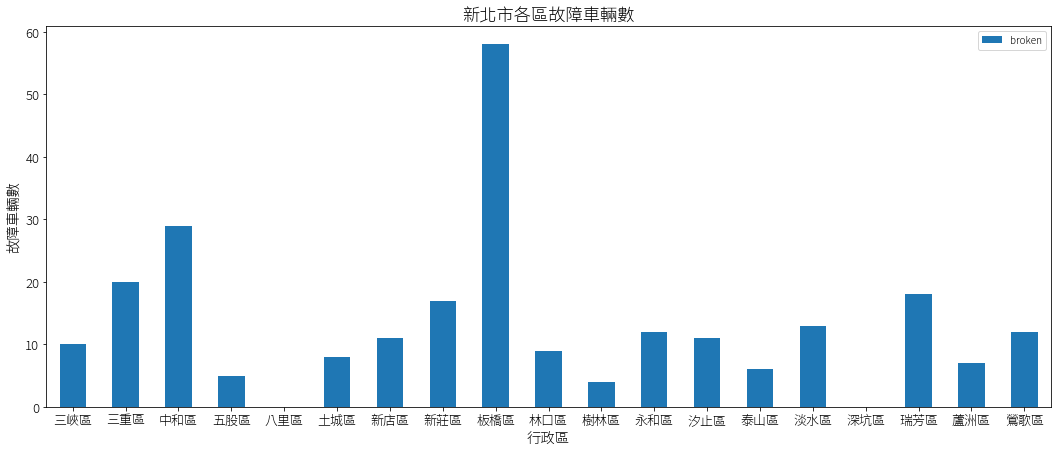

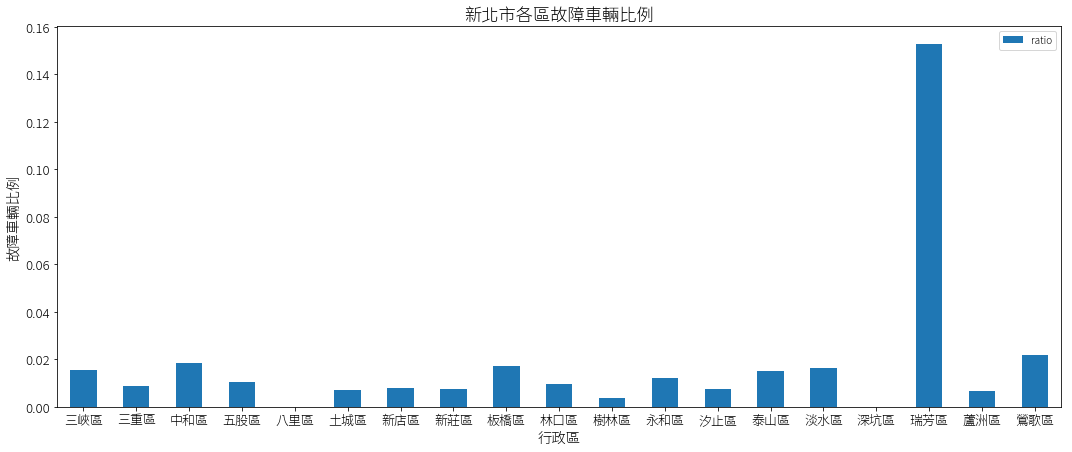

In [6]:
# 故障車輛數
df_p = pd.pivot_table(data = df, values = 'broken', index = 'sarea', aggfunc = "sum").reset_index()
df_p.plot(x = 'sarea', y = 'broken', kind = 'bar', figsize = (18, 7), fontsize = 13)
plt.xlabel("行政區", fontsize = 'x-large')
plt.ylabel("故障車輛數", fontsize = 'x-large')
pl.xticks(rotation = 360)
plt.title("新北市各區故障車輛數", fontsize = 'xx-large');

# 故障車輛比例
df_pp = pd.pivot_table(data = df, values = ['broken', 'tot'], index = 'sarea', aggfunc = "sum").reset_index()
df_pp['ratio'] = df_pp['broken'] / df_pp['tot']
df_pp.plot(x = 'sarea', y = 'ratio', kind = 'bar', figsize = (18, 7), fontsize = 13)
plt.xlabel("行政區", fontsize = 'x-large')
plt.ylabel("故障車輛比例", fontsize = 'x-large')
pl.xticks(rotation = 360)
plt.title("新北市各區故障車輛比例", fontsize = 'xx-large');